In [41]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import os


islandWidth = 8e-08
islandLength = 2.2e-07

def loadFile(name):
    data=pd.read_csv(name,sep="\t")
    data["H"]=np.round(data["B_extx (T)"]*10000/(np.sqrt(2)/2))
    data["m_full"]=(data["m_fullx (A/m)"]+data["m_fully (A/m)"])/np.sqrt(2)
    data["m"]=data["m_full"]/np.max(np.abs(data["m_full"]))
    data["hIsland_my"]=data["m_full.region1y (A/m)"]/np.max(np.sqrt(data["m_full.region1y (A/m)"]**2+data["m_full.region1x (A/m)"]**2))

    

    data=data.drop(columns=["# t (s)",\
    "mz ()","mx ()", "my ()",\
    "B_extx (T)", "B_exty (T)","B_extz (T)",\
    "m_fullz (A/m)","m_fullx (A/m)","m_fully (A/m)",\
    "m_full.region1x (A/m)","m_full.region1y (A/m)","m_full.region1z (A/m)",\
    "m_full.region2x (A/m)","m_full.region2y (A/m)","m_full.region2z (A/m)"])

    data.attrs["Hc"]=np.average(np.abs(data[np.sign(data["m"]).diff() != 0]["H"][1:]))
    data.attrs["Br"]=np.average(np.abs(data[np.sign(data["H"]).diff() != 0]["m"][1:]))

    return data

def reloadData():
    global data
    data=[]
    for constant in np.linspace(0,110e-9,111):
        fileName=f"s{constant}.out/table.txt"
        if os.path.exists(fileName):
            try:
                data.append({"constant":constant/islandLength*2,"data":loadFile(fileName)})
            except Exception:
                print(f"{fileName} failed")



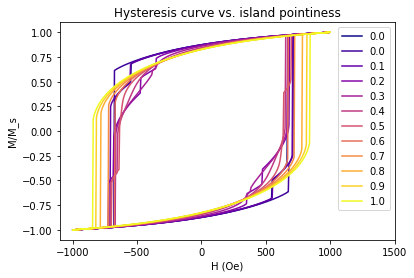

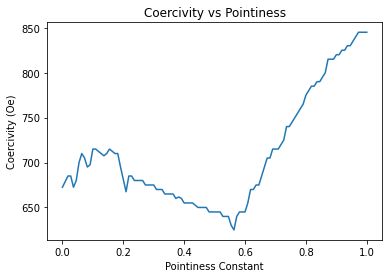

Text(0.5, 1.0, 'Retentivity vs. Pointiness')

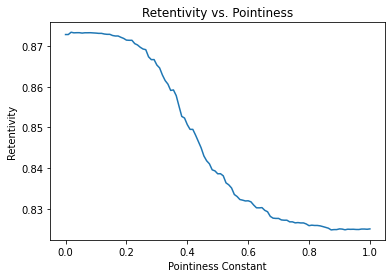

In [58]:
reloadData()


constants=np.empty((len(data)))
Hc=np.empty(len(data))
Br=np.empty(len(data))
lastHc=None
lastBr=None
for i,entry in enumerate(data):
    curve=entry["data"]
    constant=entry["constant"]
    constants[i]=constant



    if lastBr is None or abs(curve.attrs["Br"]-lastBr)<0.2:    
        Br[i]=curve.attrs["Br"]
        lastBr=Br[i]
    else:
        Br[i]=None



    if lastHc is None or abs(curve.attrs["Hc"]-lastHc)<40:
        Hc[i]=curve.attrs["Hc"]
        lastHc=Hc[i]
    else:
        Hc[i]=None



    color=mpl.cm.plasma(constant)
    if i%10==0:
        plt.plot(curve["H"],curve["m"],c=color,label=f"{str(constant)[0:3]}")

plt.legend()
plt.xlim(-1100,1500)
plt.xlabel("H (Oe)")
plt.ylabel("M/M_s")
plt.title("Hysteresis curve vs. island pointiness")
plt.show()
plt.plot(constants[~np.isnan(Hc)],Hc[~np.isnan(Hc)])

plt.title("Coercivity vs Pointiness")
plt.xlabel("Pointiness Constant")
plt.ylabel("Coercivity (Oe)")
plt.show()

plt.plot(constants[~np.isnan(Br)],Br[~np.isnan(Br)])
plt.xlabel("Pointiness Constant")
plt.ylabel("Retentivity")
plt.title("Retentivity vs. Pointiness")

In [6]:
"""reloadData()

%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

#fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, , 50, cmap='binary')
ax.set_xlabel('H (Oe)')
ax.set_ylabel('M/M_s')
ax.set_zlabel('Island Constant');

for entry in data:
    curve=entry["data"]
    constant=entry["constant"]

    color=mpl.cm.plasma(constant/100e-9)

    plt.plot(curve["H"],curve["m"],constant,c=color)
plt.show()"""

'reloadData()\n\n%matplotlib widget\nfrom mpl_toolkits.mplot3d import Axes3D\n\n#fig = plt.figure(figsize=(12,10))\nax = plt.axes(projection=\'3d\')\n#ax.contour3D(X, Y, , 50, cmap=\'binary\')\nax.set_xlabel(\'H (Oe)\')\nax.set_ylabel(\'M/M_s\')\nax.set_zlabel(\'Island Constant\');\n\nfor entry in data:\n    curve=entry["data"]\n    constant=entry["constant"]\n\n    color=mpl.cm.plasma(constant/100e-9)\n\n    plt.plot(curve["H"],curve["m"],constant,c=color)\nplt.show()'

(0.940015, 0.975158, 0.131326, 1.0)
